# Image Processing: Linear and Non-Linear Filtering

This notebook demonstrates the implementation and evaluation of various image filtering techniques including Box, Gaussian, and Median filters.

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### Utilities
Function to display images using `matplotlib`.

In [2]:
def show_image(title, img, cmap=None):
    plt.imshow(img, cmap=cmap)
    plt.title(title)
    plt.axis('off')
    plt.show()

### Linear Filter 1: Box Filter (Mean Filter)

In [3]:
def box_filter(image, kernel_size=3):
    pad = kernel_size // 2
    padded_img = np.pad(image, pad, mode='reflect')
    output = np.zeros_like(image, dtype=np.float32)

    kernel = np.ones((kernel_size, kernel_size)) / (kernel_size ** 2)

    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            region = padded_img[i:i+kernel_size, j:j+kernel_size]
            output[i, j] = np.sum(region * kernel)

    return output.astype(np.uint8)

### Linear Filter 2: Gaussian Filter

In [4]:
def gaussian_kernel(kernel_size=5, sigma=1):
    ax = np.linspace(-(kernel_size // 2), kernel_size // 2, kernel_size)
    xx, yy = np.meshgrid(ax, ax)
    kernel = np.exp(-(xx**2 + yy**2) / (2 * sigma**2))
    return kernel / np.sum(kernel)


def gaussian_filter(image, kernel_size=5, sigma=1):
    pad = kernel_size // 2
    padded_img = np.pad(image, pad, mode='reflect')
    output = np.zeros_like(image, dtype=np.float32)

    kernel = gaussian_kernel(kernel_size, sigma)

    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            region = padded_img[i:i+kernel_size, j:j+kernel_size]
            output[i, j] = np.sum(region * kernel)

    return output.astype(np.uint8)

### Non-Linear Filter: Median Filter

In [5]:
def median_filter(image, kernel_size=3):
    pad = kernel_size // 2
    padded_img = np.pad(image, pad, mode='reflect')
    output = np.zeros_like(image)

    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            region = padded_img[i:i+kernel_size, j:j+kernel_size]
            output[i, j] = np.median(region)

    return output

### Evaluation Metrics: MSE and PSNR

In [6]:
def mse(original, filtered):
    return np.mean((original.astype(np.float32) - filtered.astype(np.float32)) ** 2)

def psnr(original, filtered):
    mse_value = mse(original, filtered)
    if mse_value == 0:
        return float('inf')
    max_pixel = 255.0
    return 20 * np.log10(max_pixel / np.sqrt(mse_value))

### Image Loading and Preprocessing

In [7]:
img = cv2.imread("input.png", cv2.IMREAD_GRAYSCALE)

# Downsample Image (reduce size to 30%)
scale_percent = 30
width = int(img.shape[1] * scale_percent / 100)
height = int(img.shape[0] * scale_percent / 100)
dim = (width, height)

downsampled = cv2.resize(img, dim, interpolation=cv2.INTER_AREA)

### Applying Filters and Visualizing Results

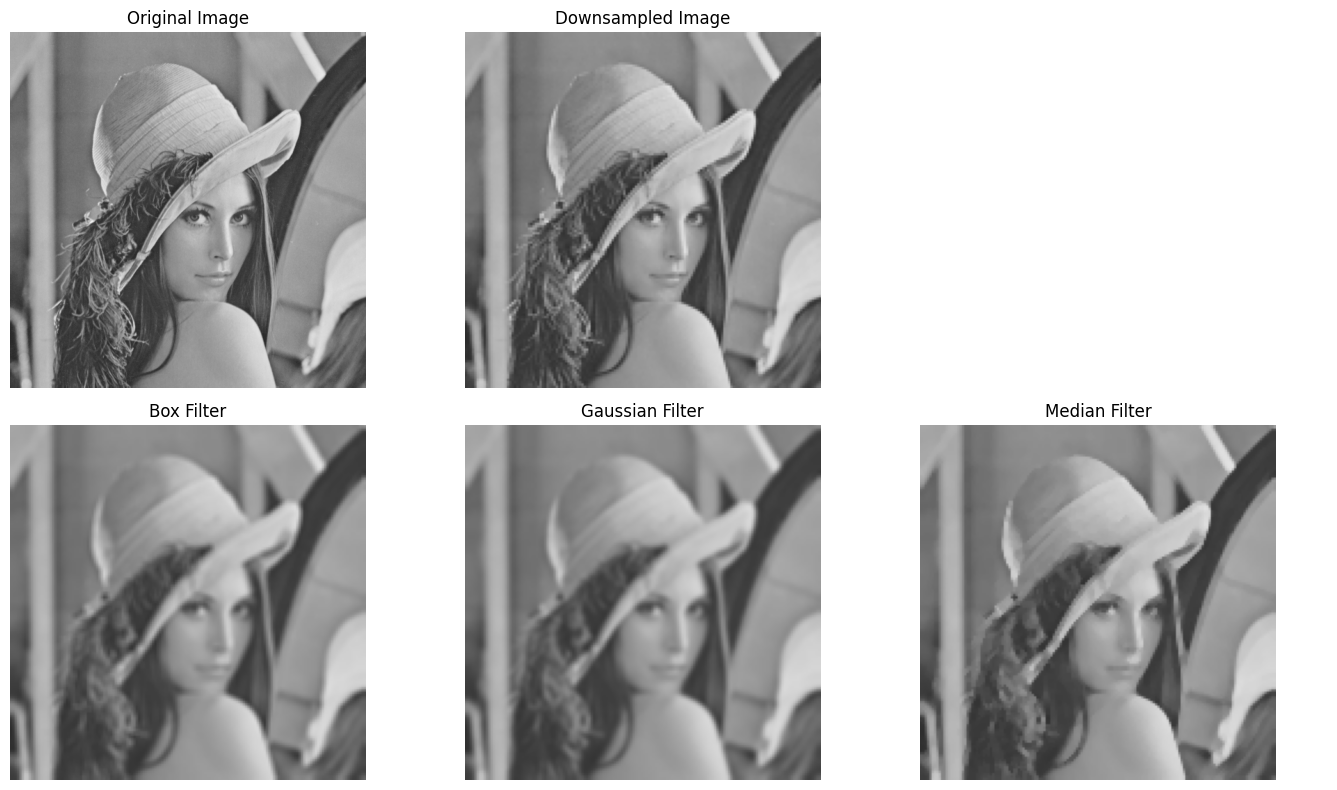

In [8]:
# Apply filters
box_img = box_filter(downsampled, kernel_size=3)
gauss_img = gaussian_filter(downsampled, kernel_size=5, sigma=1)
median_img = median_filter(downsampled, kernel_size=3)

# Convert BGR → RGB
img_rgb = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
down_rgb = cv2.cvtColor(downsampled, cv2.COLOR_GRAY2RGB)
box_rgb = cv2.cvtColor(box_img, cv2.COLOR_GRAY2RGB)
gauss_rgb = cv2.cvtColor(gauss_img, cv2.COLOR_GRAY2RGB)
median_rgb = cv2.cvtColor(median_img, cv2.COLOR_GRAY2RGB)

fig, axes = plt.subplots(2, 3, figsize=(14, 8))

axes[0, 0].imshow(img_rgb)
axes[0, 0].set_title("Original Image")
axes[0, 0].axis("off")

axes[0, 1].imshow(down_rgb)
axes[0, 1].set_title("Downsampled Image")
axes[0, 1].axis("off")

axes[0, 2].axis("off")

axes[1, 0].imshow(box_rgb)
axes[1, 0].set_title("Box Filter")
axes[1, 0].axis("off")

axes[1, 1].imshow(gauss_rgb)
axes[1, 1].set_title("Gaussian Filter")
axes[1, 1].axis("off")

axes[1, 2].imshow(median_rgb)
axes[1, 2].set_title("Median Filter")
axes[1, 2].axis("off")

plt.tight_layout()
plt.show()

### Performance Metrics Output

In [9]:
print("Box Filter:")
print("MSE:", mse(downsampled, box_img))
print("PSNR:", psnr(downsampled, box_img))

print("\nGaussian Filter:")
print("MSE:", mse(downsampled, gauss_img))
print("PSNR:", psnr(downsampled, gauss_img))

print("\nMedian Filter:")
print("MSE:", mse(downsampled, median_img))
print("PSNR:", psnr(downsampled, median_img))

Box Filter:
MSE: 71.05818
PSNR: 29.614662

Gaussian Filter:
MSE: 75.92879
PSNR: 29.32674

Median Filter:
MSE: 39.579136
PSNR: 32.15614
